In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

c:\users\natea\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('cruise_ship_info.csv')

In [3]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [4]:
df.tail()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88
157,Surf,Windstar,23,14.745,3.08,6.17,1.56,47.87,1.80


In [5]:
df.shape

(158, 9)

In [6]:
df.dtypes

Ship_name             object
Cruise_line           object
Age                    int64
Tonnage              float64
passengers           float64
length               float64
cabins               float64
passenger_density    float64
crew                 float64
dtype: object

In [7]:
df.isnull().sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

In [8]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


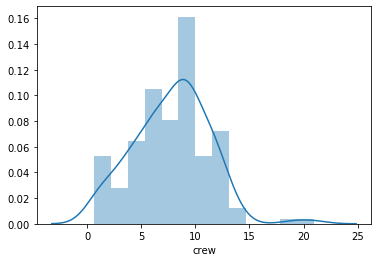

In [9]:
sns.distplot(df.crew)
plt.savefig('C:/Users/natea/figures/crewhist.png')

In [10]:
df.Cruise_line.unique()

array(['Azamara', 'Carnival', 'Celebrity', 'Costa', 'Crystal', 'Cunard',
       'Disney', 'Holland_American', 'MSC', 'Norwegian', 'Oceania',
       'Orient', 'P&O', 'Princess', 'Regent_Seven_Seas',
       'Royal_Caribbean', 'Seabourn', 'Silversea', 'Star', 'Windstar'],
      dtype=object)

In [11]:
#drop ship name and age, as these seem unlikely to affect the crew size of the ship.

In [12]:
df.drop(columns=['Ship_name','Age'], inplace=True)

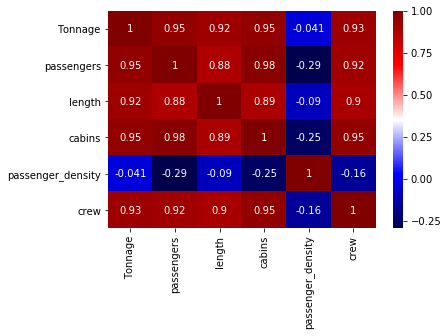

In [13]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='seismic')
plt.savefig('C:/Users/natea/figures/corrplot.png');

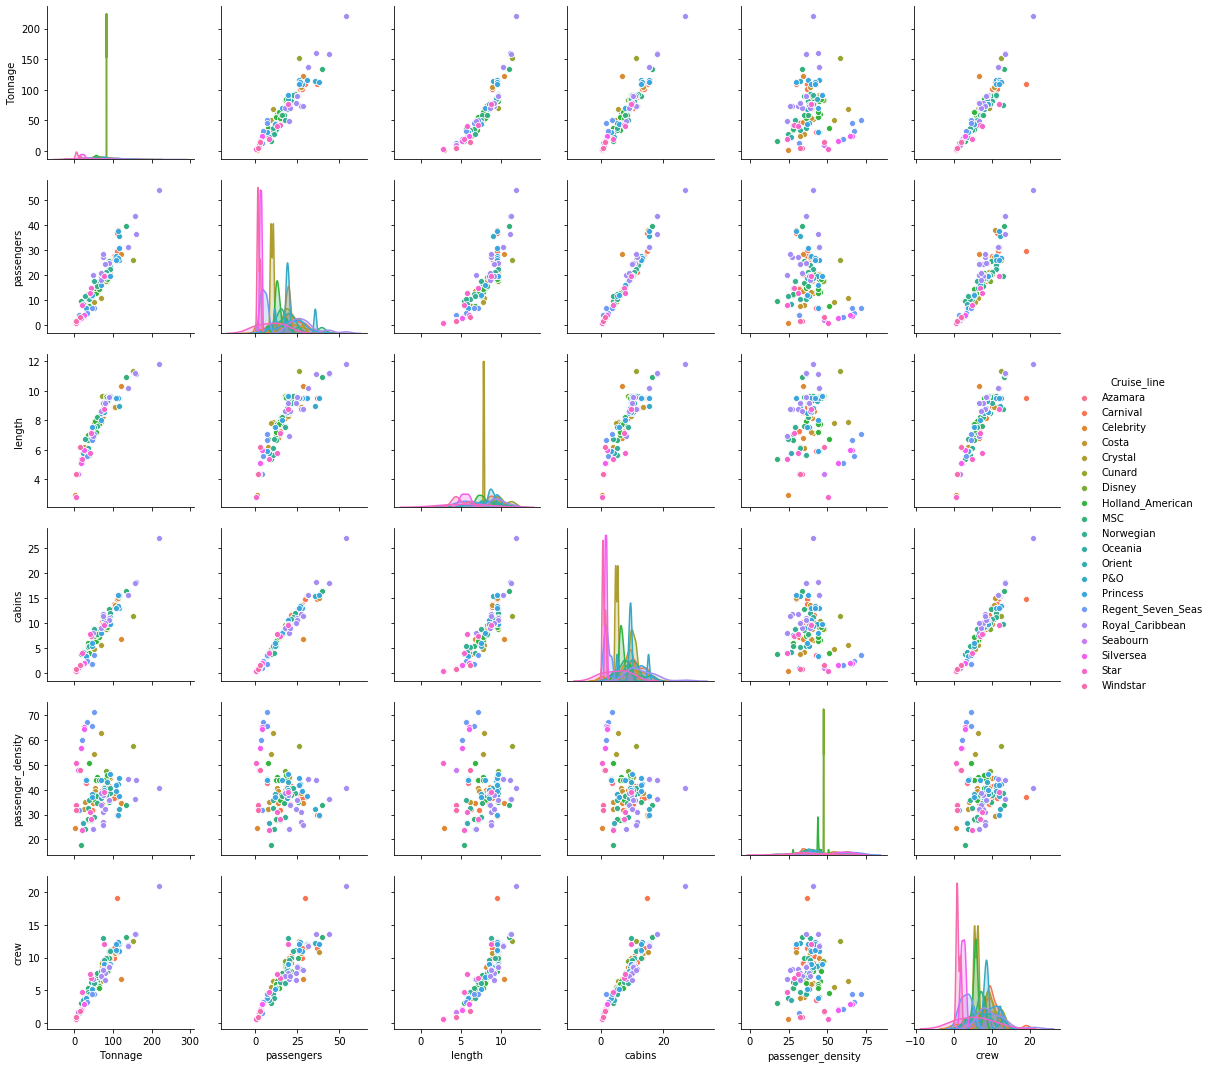

In [14]:
g = sns.pairplot(df, hue='Cruise_line')
plt.savefig('C:/Users/natea/figures/ship_pairplot.png')

In [15]:
df.drop(columns='passenger_density', inplace=True)

In [16]:
ships = pd.get_dummies(df,columns=['Cruise_line'])
ships.head()

,Tonnage,passengers,length,cabins,crew,Cruise_line_Azamara,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,Cruise_line_Crystal,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,30.277,6.94,5.94,3.55,3.55,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.277,6.94,5.94,3.55,3.55,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,47.262,14.86,7.22,7.43,6.70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,110.000,29.74,9.53,14.88,19.10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,101.353,26.42,8.92,13.21,10.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [18]:
X = ships.drop(columns='crew').values
y = ships.crew

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=33)

In [20]:
pipe_lr = Pipeline([('sca',StandardScaler()), ('lrm', LinearRegression())])

In [21]:
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('sca',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lrm',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [22]:
y_train_pred = pipe_lr.predict(X_train)

In [23]:
y_test_pred = pipe_lr.predict(X_test)

In [24]:
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

In [25]:
print('Training R2 score is: {:.2f}'.format(train_score))
print('Testing R2 score is:  {:.2f}'.format(test_score))

Training R2 score is: 0.93
Testing R2 score is:  0.96
